This test is inspired by the point spread function mentioned in Wolfe et.al. [(2002)](http://www.sciencedirect.com/science/article/pii/S0034425702000858). Basically, the modis pixel values are not only from the area they cover, but also from the rest area near it and the dialation is 0.5 pixel on each side. Therefore, our one pixel point spread function becomes much easier to be an geotransformed gaussian.

In [1]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import signal
import numpy as np
import scipy
from scipy import signal
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage
from functools import partial
import multiprocessing
import numpy.ma as ma
from collections import Counter
import pylab as plt
%matplotlib inline

In [2]:
def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus/(xgaus.sum()), ygaus/(ygaus.sum()))
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2.: center[0]+xwin/2., center[1]-ywin/2.:center[1]+ywin/2.]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

In [21]:
inds = pkl.load(open('pkls/gaus_trans.pkl','rb'))
vx,vy = pkl.load(open('pkls/gaus_valid.pkl','rb'))
xwin, ywin = 100, 100
xstd,ystd = 10, 10
angle = 0
gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                            
temp_array = np.zeros((99, 225))
temp_array[:] = np.nan
temp_array[inds[1], inds[0]] = gaus.ravel()

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [22]:
np.where(~np.isnan(temp_array))[0].min(), np.nanmax(np.where(~np.isnan(temp_array))[0]),np.where(~np.isnan(temp_array))[1].min(),np.nanmax(np.where(~np.isnan(temp_array))[1])

(0, 98, 0, 224)

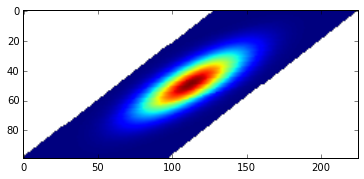

In [24]:
plt.imshow(temp_array[:99, :225])

Thus, the kernel becomes:

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


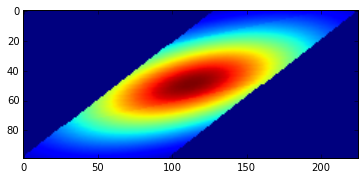

In [41]:
xwin, ywin = 100, 100
xstd,ystd = 17, 34
angle = 0
gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                            
kernel = np.zeros((99, 225))
kernel[inds[1], inds[0]] = gaus.ravel()
plt.imshow(kernel)

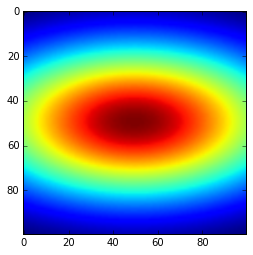

In [42]:
plt.imshow(gaus)

In [ ]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import signal
import numpy as np
import scipy
from scipy import signal
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage
from functools import partial
import multiprocessing
import numpy.ma as ma
from collections import Counter

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus/(xgaus.sum()), ygaus/(ygaus.sum()))
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2.: center[0]+xwin/2., center[1]-ywin/2.:center[1]+ywin/2.]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

In [ ]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import signal
import numpy as np
import scipy
from scipy import signal
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage
from functools import partial
import multiprocessing
import numpy.ma as ma
from collections import Counter

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus/(xgaus.sum()), ygaus/(ygaus.sum()))
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2.: center[0]+xwin/2., center[1]-ywin/2.:center[1]+ywin/2.]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

data = parallel_rw_pkl(None, 'inter_sent%i'%2, 'r')
mask = parallel_rw_pkl(None, 'inter_sentm%i'%2, 'r')
modis_sent = ma.array(data, mask=mask)

b4 = parallel_rw_pkl(None, 'band4', 'r')
stm = parallel_rw_pkl(None, 'std_m', 'r')
p_mask = np.unique(stm)

Sent = b4
struct = ndimage.generate_binary_structure(2, 2)

def get_pixels(i):
    sent =  np.zeros_like(Sent)
    mask = (stm==i)  
    brdf = (Counter(modis_sent[mask]).most_common(1)[0][0])*0.001
    xmin = np.where(mask)[0].min()
    xmax = np.where(mask)[0].max()
    ymin = np.where(mask)[1].min()
    ymax = np.where(mask)[1].max()
    indx = np.where(mask)[0]
    indy = np.where(mask)[1]
    dia_mask = bd(mask, structure=struct, iterations=200)
    sent[dia_mask] = Sent[dia_mask]
    to_conv = sent[min(np.where(dia_mask)[0]):max(np.where(dia_mask)[0])+1,
                   min(np.where(dia_mask)[1]):max(np.where(dia_mask)[1])+1]
    mask = mask[xmin:xmax+1, ymin:ymax+1]
    
    return np.array([mask,np.array(to_conv), np.array(brdf), indx, indy], dtype = object)

#Gaussian one
def shift(pat, mode='gaus'): 
    mask,to_conv, brdf, indx, indy = pat
    print mask.sum()
    if (mask.sum() >= 2000) and (mask.sum() < 3000):
        
        if mode == 'mean':
            w = 1./(np.nansum(mask))
            k = np.zeros(mask.shape).astype('float')
            k[mask] = w
            conved = signal.fftconvolve(to_conv, k, mode='valid')
            dif = abs(conved-u)
            minm = np.nanmin(dif)
            x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
            y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
            vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
            return [x, y , brdf, vals, indx,indy]

        elif mode == 'gaus':
            
            inds = pkl.load(open('pkls/gaus_trans.pkl','rb'))
            #vx,vy = pkl.load(open('pkls/gaus_valid.pkl','rb'))
            
            xwin, ywin = 100, 100  
            cost = []
            start = 1.
            star = 1
            end = 60
            for xstd in np.arange(8,20,1):
                for ystd in np.arange(10,30,1):
                    if xstd <=ystd:
                        for angle in xrange(30,160, 2):
                            
                            gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                            
                            kernel = np.zeros((99, 225))
                            kernel[inds[1], inds[0]] = gaus.ravel()
                            
                            if kernel.sum() <= 0:
                                return 0
                            else:
                                ker = kernel/(kernel.sum())
                                conved = signal.fftconvolve(to_conv, ker, mode='valid')
                                dif = abs(conved-brdf)
                                minm = np.nanmin(dif)
                                if minm<start:
                                    x = np.where(dif == minm)[0][0]-np.ceil((conved.shape[0])/2.)
                                    y = np.where(dif == minm)[1][0]-np.ceil((conved.shape[1])/2.)
                                    vals = conved[np.where(dif == minm)[0][0], np.where(dif == minm)[1][0]]
                                    cost.append([xstd, ystd, angle, x, y , brdf, vals, indx, indy])
                                    start = minm
                                    print 'Find One!!', start
                    else:
                        pass
            return cost[-1]           
        else:
            pass   
    else:
        pass
        
        
        
ites = np.array_split(p_mask, 5)[2]
ite = np.array_split(ites, len(ites)/40)

patches = (get_pixels(k) for k in ite[0])
par = partial(shift, mode='gaus')
pool = multiprocessing.Pool(processes=45)
data = pool.map(par, patches)
pool.close()
pool.join()
parallel_rw_pkl(data, '2906testgaus%02d'%i, 'w')

In [67]:
xstd = []
ystd = []
angle = []
sx = []
sy = []
brdf = []
vals = []
indx = []
indy = []
for i in data:
    if i is None:
        pass
    else:
        for j,k in enumerate([xstd, ystd, angle, sx, sy , brdf, vals, indx, indy]):
            try:
                k.append(i[j])
            except:
                pass

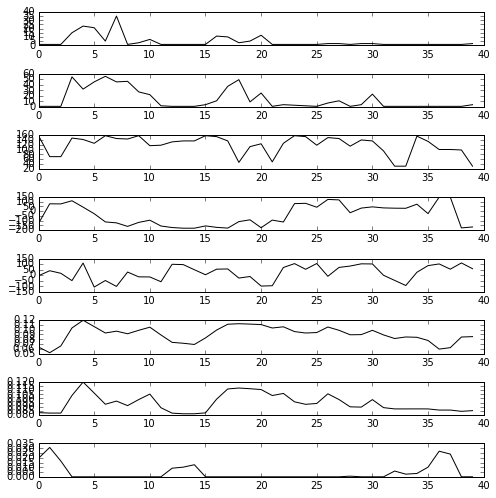

In [69]:
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    ax.plot(l, color='k')
    #fig.colorbar(im)
plt.tight_layout()

LinregressResult(slope=1.0000000308214729, intercept=-3.3152868783581368e-09, rvalue=0.99999999999999889, pvalue=2.5409291365830556e-111, stderr=1.2166747541626605e-08)


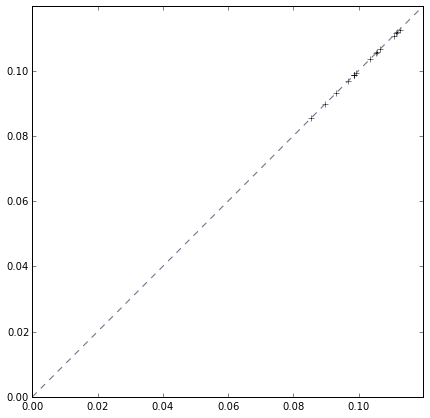

In [70]:
a = np.array(brdf)[np.array(xstd)>1.0001]
b = np.array(vals)[np.array(xstd)>1.0001]
op_cost = np.array(zip(a, b))
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
print r

LinregressResult(slope=1.7827228973367737, intercept=-0.076755046144450514, rvalue=0.81514497916492634, pvalue=2.1658280448634143e-06, stderr=0.2764461984831178)


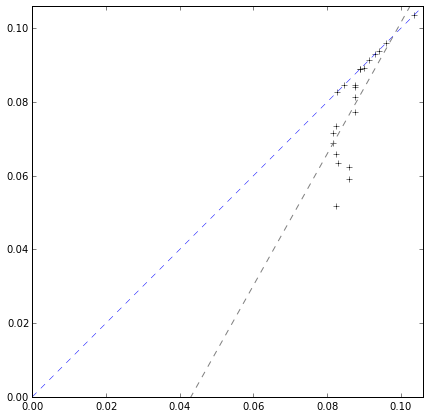

In [71]:
a = np.array(brdf)[np.array(xstd)<=1.0001]
b = np.array(vals)[np.array(xstd)<=1.0001]
op_cost = np.array(zip(a, b))
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
print r

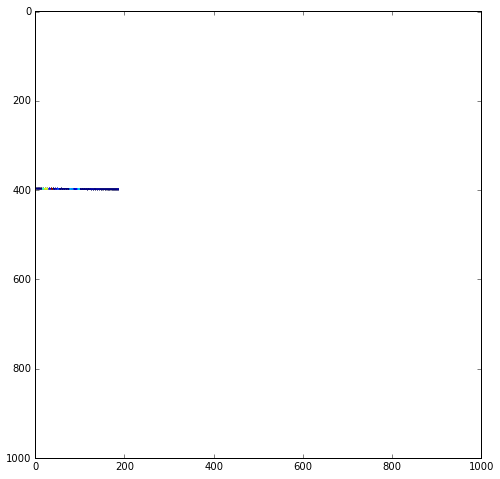

In [72]:
plt.figure(figsize = (8,8))
data = np.zeros((10980,10980))
data[:] = np.nan
for i,j in enumerate(xstd):
    data[indx[i], indy[i]] = j
plt.imshow(data[:10000:10,:10000:10])

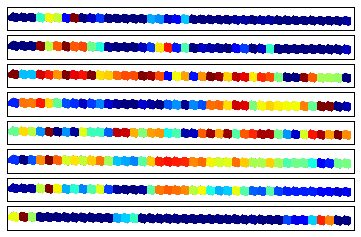

In [81]:
fig = plt.figure(figsize = (18,4))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.zeros((10980,10980))
    data[:] = np.nan
    for i,j in enumerate(l):
        data[indx[i], indy[i]] = j
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    im = ax.imshow(data[3920:4050,:1900])
    #ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=0)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

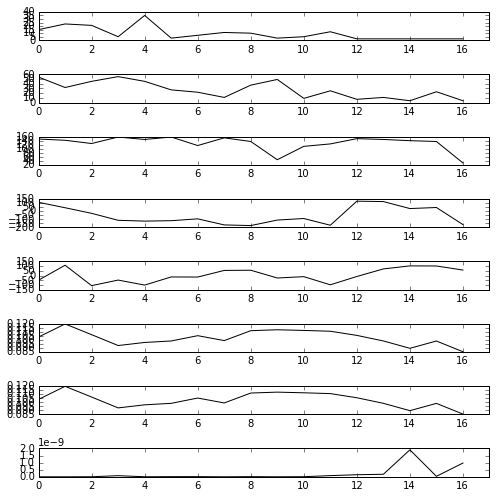

In [86]:
optimal1 = np.array(xstd)>1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , np.array(brdf), np.array(vals),abs(np.array(brdf)-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    ax.plot(data[optimal1], color='k')
    ax.set_xlim(0, len(data[optimal1]))
    #fig.colorbar(im)
    #ax.get_yaxis().set_ticks([])
plt.tight_layout()

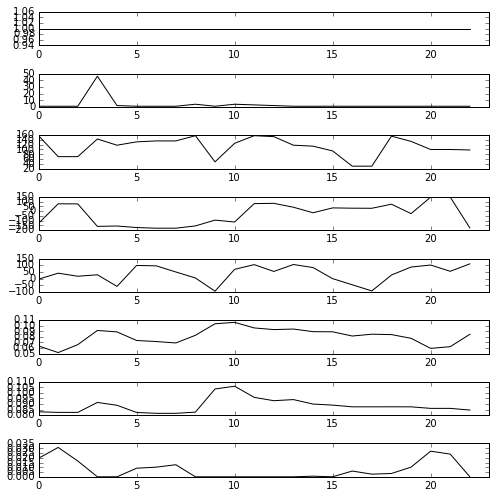

In [88]:
optimal2 = np.array(xstd)<=1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , np.array(brdf), np.array(vals),abs(np.array(brdf)-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    ax.plot(data[optimal2], color='k')
    ax.set_xlim(0, len(data[optimal2]))
    #fig.colorbar(im)
    #ax.get_yaxis().set_ticks([])

    plt.tight_layout()

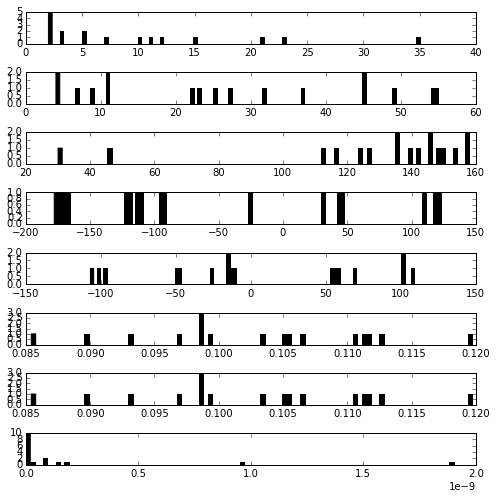

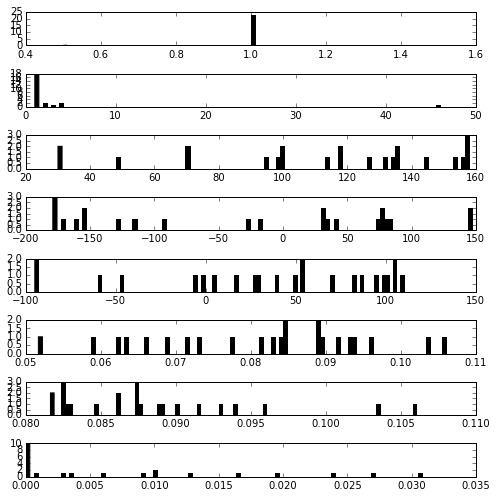

In [92]:
optimal1 = np.array(xstd)>1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    a,b,c = ax.hist(data[optimal1], color='k', bins = 100)
    #fig.colorbar(im)
plt.tight_layout()

optimal2 = np.array(xstd)<=1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    a,b,c = ax.hist(data[optimal2], color='k', bins = 100)
    
    #fig.colorbar(im)
plt.tight_layout()

